<a href="https://colab.research.google.com/github/NP-15/Machine-learning/blob/main/Sessions/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
# Code to plot

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)

    if hasattr(classifier, "support_vectors_"):
        plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1],
                    s=150, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

## Linear SVM with Linear kernel

Accuracy of Linear SVM for binary classification: 1.0


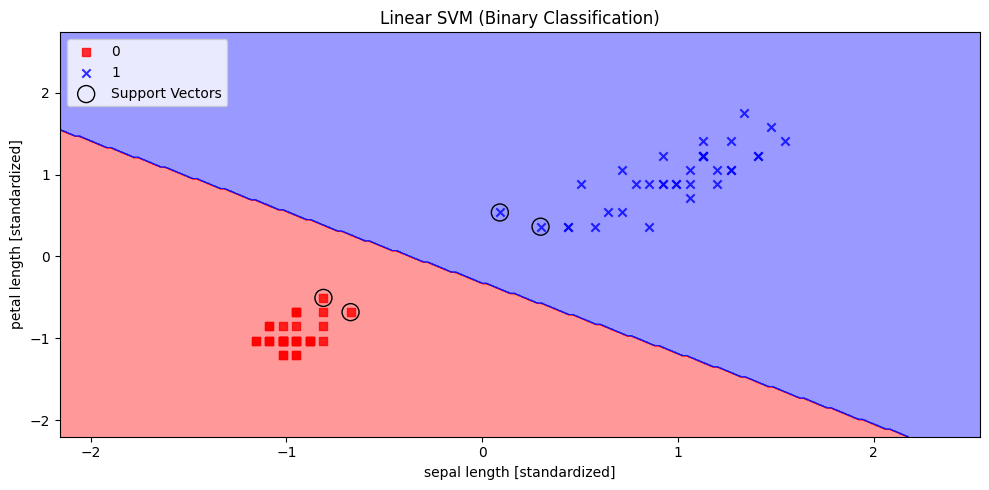

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm_linear = SVC(kernel='linear', C=1.0, random_state=0)
svm_linear.fit(X_train_std, y_train)
linear_accuracy = svm_linear.score(X_test_std, y_test)
print("Accuracy of Linear SVM for binary classification:", linear_accuracy)

plt.figure(figsize=(10, 5))
plot_decision_regions(X_train_std, y_train, classifier=svm_linear)
plt.title('Linear SVM (Binary Classification)')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Non-linear SVM with Gaussian Kernel

In [5]:
def gaussian_kernel(X1, X2, sigma=1.0):
    sq_dist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-0.5 * (1 / sigma**2) * sq_dist)

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

K_train = gaussian_kernel(X_train_std, X_train_std)
K_test_train = gaussian_kernel(X_test_std, X_train_std)

svm_gaussian = SVC(kernel='precomputed', C=1.0)
svm_gaussian.fit(K_train, y_train)

accuracy = svm_gaussian.score(K_test_train, y_test)
print("Accuracy of Non-linear SVM with Gaussian kernel:", accuracy)

Accuracy of Non-linear SVM with Gaussian kernel: 0.9777777777777777


## Non-linear with RBF kernel

Classes used for binary classification: {0, 1}
Accuracy of Non-linear SVM for binary classification: 1.0


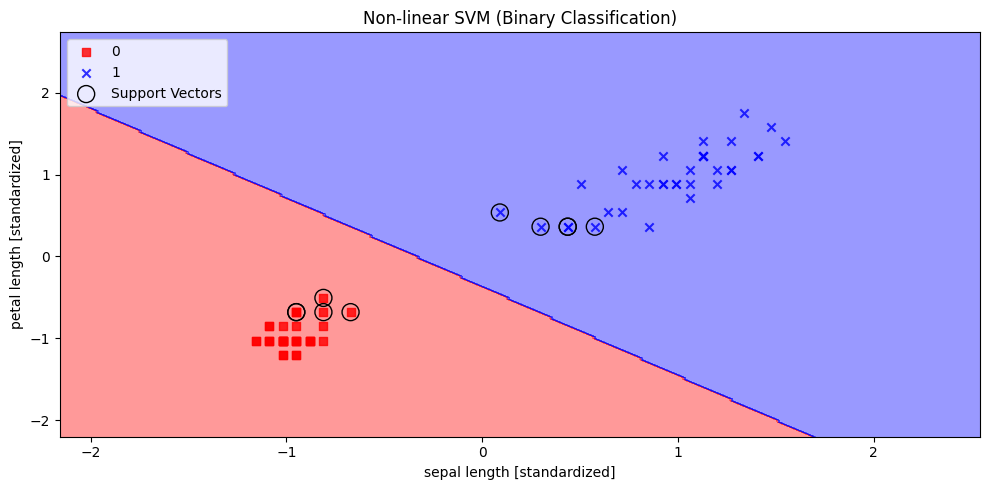

In [6]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=0)

classes_used = set(y_binary)
print("Classes used for binary classification:", classes_used)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm_nonlinear = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=0)
svm_nonlinear.fit(X_train_std, y_train)

nonlinear_accuracy = svm_nonlinear.score(X_test_std, y_test)
print("Accuracy of Non-linear SVM for binary classification:", nonlinear_accuracy)

plt.figure(figsize=(10, 5))
plot_decision_regions(X_train_std, y_train, classifier=svm_nonlinear)
plt.title('Non-linear SVM (Binary Classification)')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Non-Linear SVM with Sigmoid Kernel

Accuracy of Non-linear SVM with Sigmoid kernel: 1.0


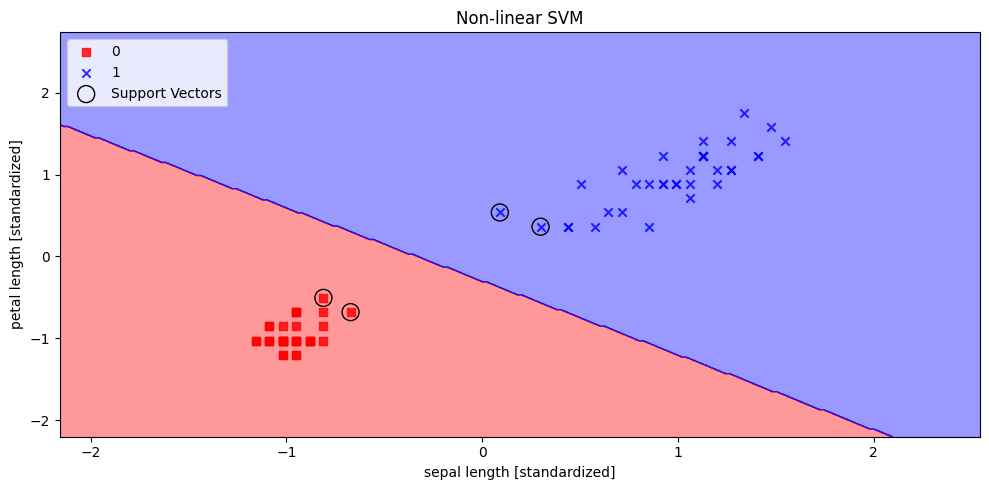

In [7]:
svm_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='auto', coef0=0.0, random_state=0)
svm_sigmoid.fit(X_train_std, y_train)

accuracy = svm_sigmoid.score(X_test_std, y_test)
print("Accuracy of Non-linear SVM with Sigmoid kernel:", accuracy)

plt.figure(figsize=(10, 5))
plot_decision_regions(X_train_std, y_train, classifier=svm_sigmoid)
plt.title('Non-linear SVM')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Non-Linear SVM with Polynomial Kernel

Accuracy of Non-linear SVM with Polynomial kernel: 1.0


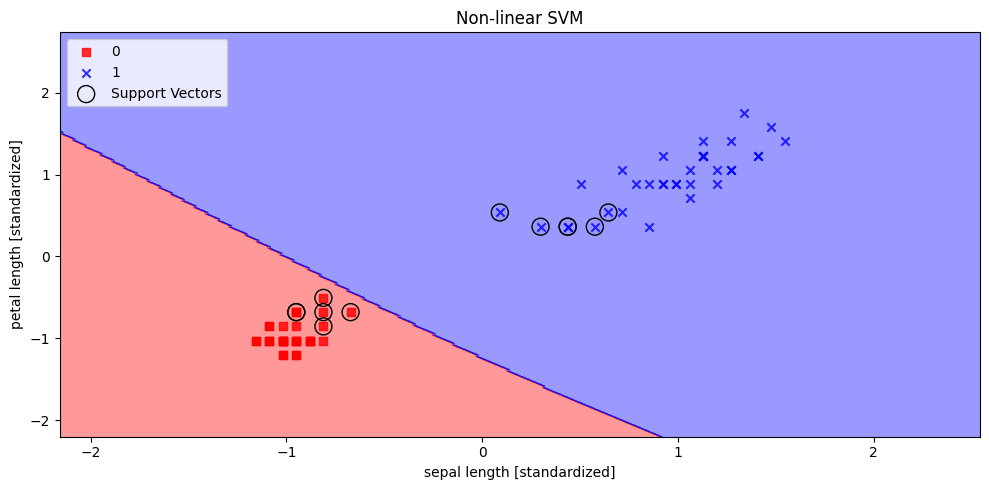

In [8]:
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='auto', coef0=0.0, random_state=0)
svm_poly.fit(X_train_std, y_train)

accuracy = svm_poly.score(X_test_std, y_test)
print("Accuracy of Non-linear SVM with Polynomial kernel:", accuracy)

plt.figure(figsize=(10, 5))
plot_decision_regions(X_train_std, y_train, classifier=svm_poly)
plt.title('Non-linear SVM')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()